In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [59]:
file_path = "12_coin_Bitcoin.csv"
df = pd.read_csv(file_path)
df.describe()
print(df)

       SNo     Name Symbol                 Date          High           Low  \
0        1  Bitcoin    BTC  2013-04-29 23:59:59    147.488007    134.000000   
1        2  Bitcoin    BTC  2013-04-30 23:59:59    146.929993    134.050003   
2        3  Bitcoin    BTC  2013-05-01 23:59:59    139.889999    107.720001   
3        4  Bitcoin    BTC  2013-05-02 23:59:59    125.599998     92.281898   
4        5  Bitcoin    BTC  2013-05-03 23:59:59    108.127998     79.099998   
...    ...      ...    ...                  ...           ...           ...   
2986  2987  Bitcoin    BTC  2021-07-02 23:59:59  33939.588699  32770.680780   
2987  2988  Bitcoin    BTC  2021-07-03 23:59:59  34909.259899  33402.696536   
2988  2989  Bitcoin    BTC  2021-07-04 23:59:59  35937.567147  34396.477458   
2989  2990  Bitcoin    BTC  2021-07-05 23:59:59  35284.344430  33213.661034   
2990  2991  Bitcoin    BTC  2021-07-06 23:59:59  35038.536363  33599.916169   

              Open         Close        Volume     

In [60]:
# Dropping open and close columns
columns_to_drop = ['Open', 'Close']
df.drop(columns=columns_to_drop, inplace=True)
# making a new column of containing avg(Low,High)
df['Avg_Column'] = (df['High'] + df['Low']) / 2

df.describe()

,SNo,High,Low,Volume,Marketcap,Avg_Column
count,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03,2991.000000
mean,1496.000000,6893.326038,6486.009539,1.090633e+10,1.208761e+11,6689.667788
std,863.571653,11642.832456,10869.032130,1.888895e+10,2.109438e+11,11252.675477
min,1.000000,74.561096,65.526001,0.000000e+00,7.784112e+08,70.590549
25%,748.500000,436.179001,422.879486,3.036725e+07,6.305579e+09,430.268753
50%,1496.000000,2387.610107,2178.500000,9.460360e+08,3.741503e+10,2276.190063
75%,2243.500000,8733.926948,8289.800459,1.592015e+10,1.499957e+11,8525.983357
max,2991.000000,64863.098908,62208.964366,3.509679e+11,1.186364e+12,63208.947799


In [61]:
df['Date'] = pd.to_datetime(df['Date'])
# Reshape dataframe to long format
df['Date'] = df['Date'].dt.strftime('%A, %B %d, %Y')
df.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Volume', 'Marketcap',
       'Avg_Column'],
      dtype='object')

In [62]:
features = df
features.drop(columns=['SNo','Name','Symbol','Date'], inplace=True)
target = df['Avg_Column']

# Split the dataset into (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)


Mean Squared Error: 1.2986253874717936e-10
Mean Absolute Error: 7.111396081778616e-06


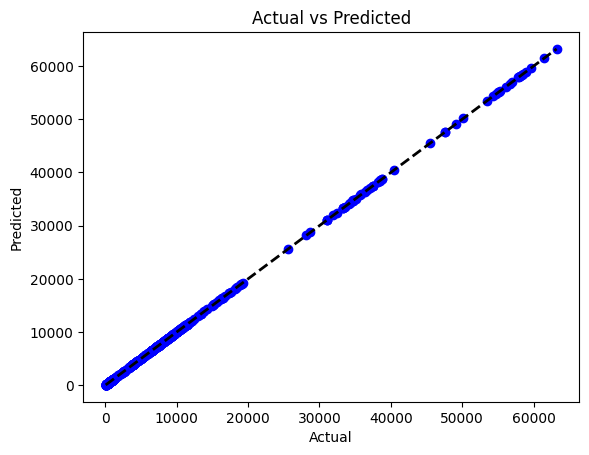

In [63]:
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()